In [2]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PowerTransformer

In [4]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())

['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


# Data Exploration

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [7]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [8]:
print(df.duplicated().sum())

0


## - Dropping Null Values

In [9]:
df = df.dropna()
df = df.reset_index()
df.isnull().sum()

index                0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
ordinal_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
class_category_order = [
['Male', 'Female', 'Other'], 
['Yes', 'No'],
['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
['Urban', 'Rural'],
['formerly smoked', 'never smoked', 'smokes', 'Unknown']
]
encoder = OrdinalEncoder(categories = class_category_order)
df[ordinal_features] = encoder.fit_transform(df[ordinal_features])
df

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,0.0,67.0,0,1,0.0,0.0,0.0,228.69,36.6,0.0,1
1,2,31112,0.0,80.0,0,1,0.0,0.0,1.0,105.92,32.5,1.0,1
2,3,60182,1.0,49.0,0,0,0.0,0.0,0.0,171.23,34.4,2.0,1
3,4,1665,1.0,79.0,1,0,0.0,1.0,1.0,174.12,24.0,1.0,1
4,5,56669,0.0,81.0,0,0,0.0,0.0,0.0,186.21,29.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,5104,14180,1.0,13.0,0,0,1.0,3.0,1.0,103.08,18.6,3.0,0
4905,5106,44873,1.0,81.0,0,0,0.0,1.0,0.0,125.20,40.0,1.0,0
4906,5107,19723,1.0,35.0,0,0,0.0,1.0,1.0,82.99,30.6,1.0,0
4907,5108,37544,0.0,51.0,0,0,0.0,0.0,1.0,166.29,25.6,0.0,0


In [11]:
df.describe()

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,2573.495417,37064.313506,0.590548,42.865374,0.091872,0.049501,0.347321,0.842534,0.492768,105.305150,28.893237,1.583826,0.042575
std,1470.744521,20995.098457,0.492197,22.555115,0.288875,0.216934,0.476167,1.124057,0.499999,44.424341,7.854067,1.090146,0.201917
min,0.000000,77.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,1295.000000,18605.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.070000,23.500000,1.000000,0.000000
50%,2578.000000,37608.000000,1.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.680000,28.100000,1.000000,0.000000
75%,3851.000000,55220.000000,1.000000,60.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.570000,33.100000,3.000000,0.000000
max,5109.000000,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


# Outliers

In [12]:
def CountOutliers(series):
    series = pd.to_numeric(series)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

numerical_features = ['age', 'avg_glucose_level', 'bmi']

for feature in numerical_features:
    print(f"{feature} : {CountOutliers(df[feature])}")

age : 0
avg_glucose_level : 567
bmi : 110


## - Using Power Transformation

In [17]:
pt = PowerTransformer(method='yeo-johnson')
df[['avg_glucose_level', 'bmi']] = pt.fit_transform(df[['avg_glucose_level', 'bmi']])
df

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,0.0,67.0,0,1,0.0,0.0,0.0,1.887583,1.025544,0.0,1
1,2,31112,0.0,80.0,0,1,0.0,0.0,1.0,0.412222,0.576840,1.0,1
2,3,60182,1.0,49.0,0,0,0.0,0.0,0.0,1.461100,0.791437,2.0,1
3,4,1665,1.0,79.0,1,0,0.0,1.0,1.0,1.489196,-0.568170,1.0,1
4,5,56669,0.0,81.0,0,0,0.0,0.0,0.0,1.597327,0.146433,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,5104,14180,1.0,13.0,0,0,1.0,3.0,1.0,0.335629,-1.529018,3.0,0
4905,5106,44873,1.0,81.0,0,0,0.0,1.0,0.0,0.837798,1.360903,1.0,0
4906,5107,19723,1.0,35.0,0,0,0.0,1.0,1.0,-0.363402,0.349292,1.0,0
4907,5108,37544,0.0,51.0,0,0,0.0,0.0,1.0,1.410821,-0.324529,0.0,0


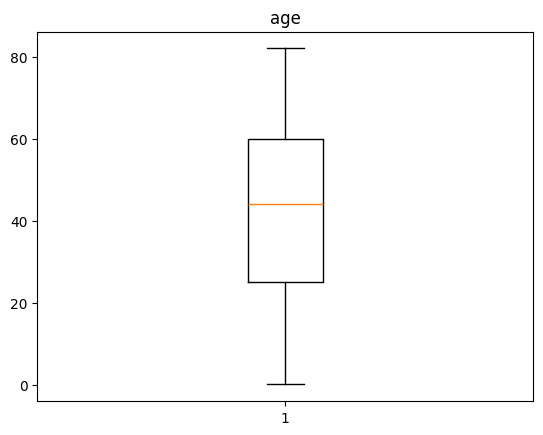

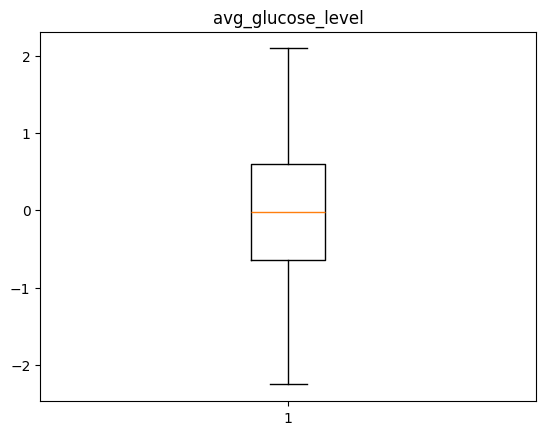

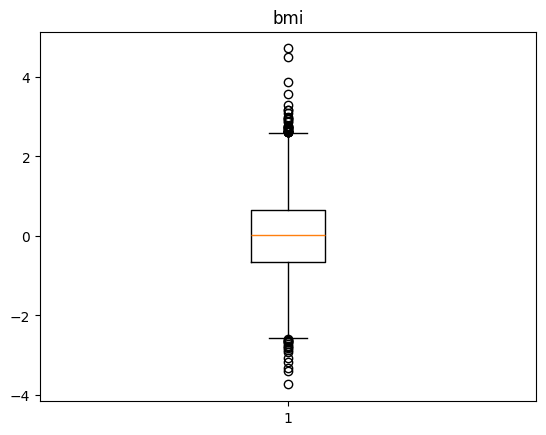

In [18]:
for feature in numerical_features:
    plt.figure()
    plt.boxplot(df[feature])
    plt.title(feature)

In [19]:
def CountOutliers(series):
    series = pd.to_numeric(series)
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

numerical_features = ['age', 'avg_glucose_level', 'bmi']

for feature in numerical_features:
    print(f"{feature} : {CountOutliers(df[feature])}")

age : 0
avg_glucose_level : 0
bmi : 48
